In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


Bad key "text.kerning_factor" on line 4 in
/Users/jordan5560/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("wine.csv",index_col=0)
df = df.drop(labels=["region_2","taster_name","title"],axis='columns')
df.head()


,country,description,designation,points,price,province,region_1,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Pinot Noir,Sweet Cheeks,2012


### Text Processing

Converting words in descriptions into binary numbers.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
cv = CountVectorizer(stop_words='english', max_features=500, binary=True)
cv.fit(df.description)
X = cv.fit_transform(df.description)
X = X.toarray()
df = pd.concat([df, pd.DataFrame(X)], axis=1)
df.to_csv("new_df.csv")

In [5]:
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [6]:
df_model = df.sample(500).dropna()
X = df_model.drop(["price",'description'],axis='columns')
drop_enc = OneHotEncoder(drop='first').fit(X)
X = drop_enc.transform(X).toarray()
X = pd.DataFrame(X)
y = np.array(df_model['price']).reshape(-1,)

### Random Forest with K-Fold Cross Validation

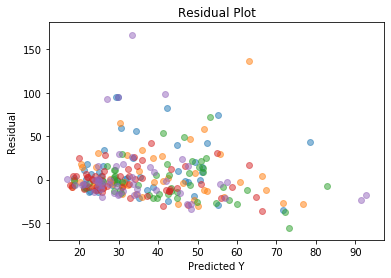

In [7]:
kf = KFold(n_splits=5)
mse = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf= RandomForestRegressor(n_estimators=100,max_features=None)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    mse.append(mean_squared_error(y_pred,y_test))
    plt.scatter(y_pred, y_test-y_pred ,alpha=0.5)
    plt.ylabel("Residual")
    plt.xlabel("Predicted Y")
    plt.title("Residual Plot")

In [8]:
print("Mean squared error: ",np.mean(mse))

Mean squared error:  758.3332901432881


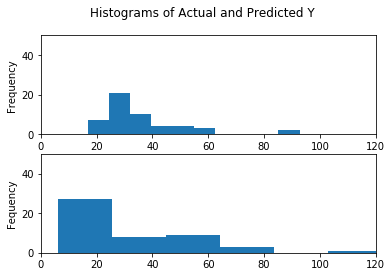

In [9]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.hist(y_pred)
ax2.hist(y_test)
ax1.set_xlim(0,120)
ax2.set_xlim(0,120)
ax1.set_ylim(0,50)
ax2.set_ylim(0,50)
ax1.set_ylabel("Frequency")
ax2.set_ylabel("Fequency")
fig.suptitle("Histograms of Actual and Predicted Y")
plt.show()

### Linear Regression with K-Fold Cross Validation

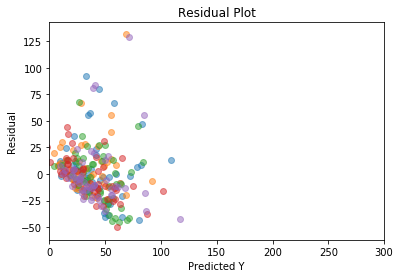

In [10]:
kf = KFold(n_splits=5)
mse = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr= linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    mse.append(mean_squared_error(y_pred,y_test))
    plt.scatter(y_pred, y_test-y_pred ,alpha=0.5)
    plt.xlim(0,300)
    plt.ylabel("Residual")
    plt.xlabel("Predicted Y")
    plt.title("Residual Plot")

In [11]:
print("Mean squared error: ",np.mean(mse))

Mean squared error:  685.1122479149092


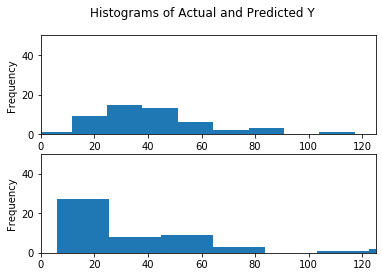

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.hist(y_pred)
ax2.hist(y_test)
ax1.set_ylim(0,50)
ax2.set_ylim(0,50)
ax1.set_xlim(0,125)
ax2.set_xlim(0,125)
fig.suptitle("Histograms of Actual and Predicted Y")
ax1.set_ylabel("Frequency")
ax2.set_ylabel("Frequency")
plt.show()

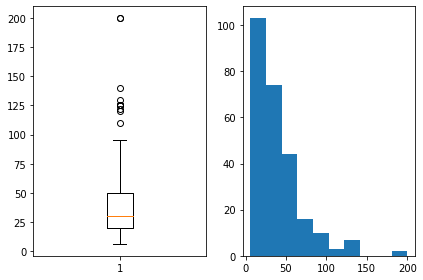

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot(df_model.price)
ax2.hist(df_model.price)
fig.tight_layout()
plt.show()

### Polynomial Regression with K-Fold Cross Validation

In [14]:
from sklearn.preprocessing import PolynomialFeatures

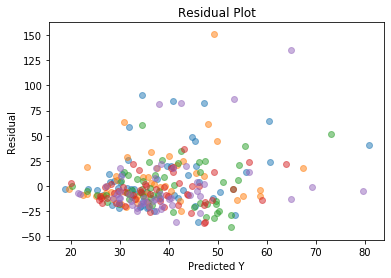

In [15]:
kf = KFold(n_splits=5)
mse = []
polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr= linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    mse.append(mean_squared_error(y_pred,y_test))
    plt.scatter(y_pred, y_test-y_pred ,alpha=0.5)
    plt.ylabel("Residual")
    plt.xlabel("Predicted Y")
    plt.title("Residual Plot")

In [16]:
print("Mean squared error: ",np.mean(mse))

Mean squared error:  677.0551025606294


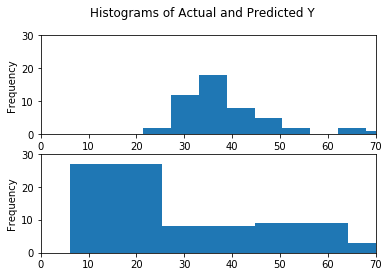

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.hist(y_pred)
ax2.hist(y_test)
# ax1.set_ylim(0,100)
# ax2.set_ylim(0,100)
ax1.set_xlim(0,70)
ax2.set_xlim(0,70)
ax1.set_ylim(0,30)
ax2.set_ylim(0,30)
fig.suptitle("Histograms of Actual and Predicted Y")
ax1.set_ylabel("Frequency")
ax2.set_ylabel("Frequency")
plt.show()